
# Minería de Datos - Proyecto 2 
----
#### Integrantes:
1. Benjamín Cordero
2. Jaime Torres
3. Camila Retamales
4. Jose Flores
5. Joaquin Cortes

----

#### Introduccíon

A continuacion se analizara el dataset [Credit Card Approval Prediction](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction) el cual consiste en dos archivos .csv que contienen la informacion de aplicacion para tarjetas de credito y el credit score de cada aplicante.

----

#### Problema

El objetivo de este analisis sera predecir si el aplicante a la tarjeta de credito es "bueno" o "malo" para esto se deberan utilizar modelos de machine learning. La definicion de bueno o malo sera definida luego de analizar los datos del dataset. 
En resumen se debe generar un analisis de clasificacion binaria en el dataset.

----


In [170]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

In [171]:
# Base de datos
filepath1 = os.getcwd() + os.path.sep + "application_record.csv"
filepath2 = os.getcwd() + os.path.sep + "credit_record.csv"
application_record = pd.read_csv(filepath1,delimiter=',')
credit_record = pd.read_csv(filepath2,delimiter=',')
# Observamos cuantos datos y columnas tenemos
print(f"DataFrame 1 de {application_record.shape[0]} filas y {application_record.shape[1]} columnas.")
print(f"DataFrame 2 de {credit_record.shape[0]} filas y {credit_record.shape[1]} columnas.")

DataFrame 1 de 438557 filas y 18 columnas.
DataFrame 2 de 1048575 filas y 3 columnas.


In [172]:
# Se observó la base de datos
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [173]:
# Se observó la base de datos 
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


#### Análisis Exploratorio de los datos

Se observaran ambos archivos csv para entender que variables poseen cada una de estas.


Analisis de las columnas de application_record.csv:

1. ID:                  Número de Cliente 	
2. CODE_GENDER:         Género 	
3. FLAG_OWN_CAR:        Si tiene auto
4. FLAG_OWN_REALTY:	    Si tiene una propiedad	
5. CNT_CHILDREN:        Número de hijos
6. AMT_INCOME_TOTAL:    Sueldo anual
7. NAME_INCOME_TYPE:    Tipo de Sueldo	
8. NAME_EDUCATION_TYPE: Nivel de educación	
9. NAME_FAMILY_STATUS:  Estado marital
10. NAME_HOUSING_TYPE:  Forma de pago de propiedad/vida	
11. DAYS_BIRTH:         Días que se encuentra vivo desde el día 0(hoy) hacia atrás -1 significa ayer.
12. DAYS_EMPLOYED:      Día que se inicia su trabajo se cuenta hacia atrás 0(hoy)-1 ayer, si es positivo,  días sin trabajo.
13. FLAG_MOBIL:         Si tiene teléfono móvil
14. FLAG_WORK_PHONE:    Si tiene teléfono de trabajo	
15. FLAG_PHONE:         Si tiene teléfono fijo	
16. FLAG_EMAIL:         Si tiene email 	
17. OCCUPATION_TYPE:    Ocupación
18. CNT_FAM_MEMBERS:    Cantidad de miembros familiares

Analisis de las columnas de credit_record.csv:

1. ID:	                Número de cliente 	
2. MONTHS_BALANCE:	Mes de registro. El mes de los datos extraídos es el punto de partida, al revés, 0 es el mes actual, -1 es el mes anterior, etc.
3. STATUS:	            Estado 
                        0: 1-29 días de atraso 
                        1: 30-59 días de atraso 
                        2: 60-89 días de atraso 
                        3: 90-119 días de atraso 
                        4: 120-149 días de atraso 
                        5: Atrasos o deudas incobrables, cancelaciones por más de 150 días 
                        C: pagado ese mes X: No hay préstamo para el mes

----

#### Seleccion y/o extraccion de atributos

En esta seccion se analizaran la informacion de cada columna y se limpiara la base de datos en base lo observado.

In [174]:
# Unimos las dos bases de datos basándonos en el ID
data = application_record.merge(credit_record,how='inner',on=['ID'])
# Eliminamos datos duplicados en la columna ID para evitar que nuestros modelos posean datos repetidos
data = data.drop_duplicates('ID') 
data.head(4)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,C
61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0


In [175]:
# Analizamos la información de las columnas para ver si hay datos nulos
print(application_record.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

Se puede observar que OCCUPATION_TYPE solo tiene 304354 datos no nulos, por lo que se tendran que rellenar o eliminar la columna de por si.

In [176]:
# Analizamos la variable OCCUPATION_TYPE, ya que es la única que tiene valores nulos
data['OCCUPATION_TYPE'].value_counts()

Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: OCCUPATION_TYPE, dtype: int64

In [177]:
# Rellenamos los valores de OCCUPATION_TYPE con el valor OTHER
data['OCCUPATION_TYPE'].fillna('OTHER',inplace=True)
# Se revisa si existe valores nulos
data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

Ya no existen valores nulos dentro de OCCUPATION_TYPE.

In [178]:
# Revisamos si hay valores duplicados
data.duplicated().sum()

0

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 777701
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null

Despues de hacer un merge ambas bases de datos y eliminar los valores repetidos de ID, quedamos con un data set de 36457 datos sin nigun valor duplicado.

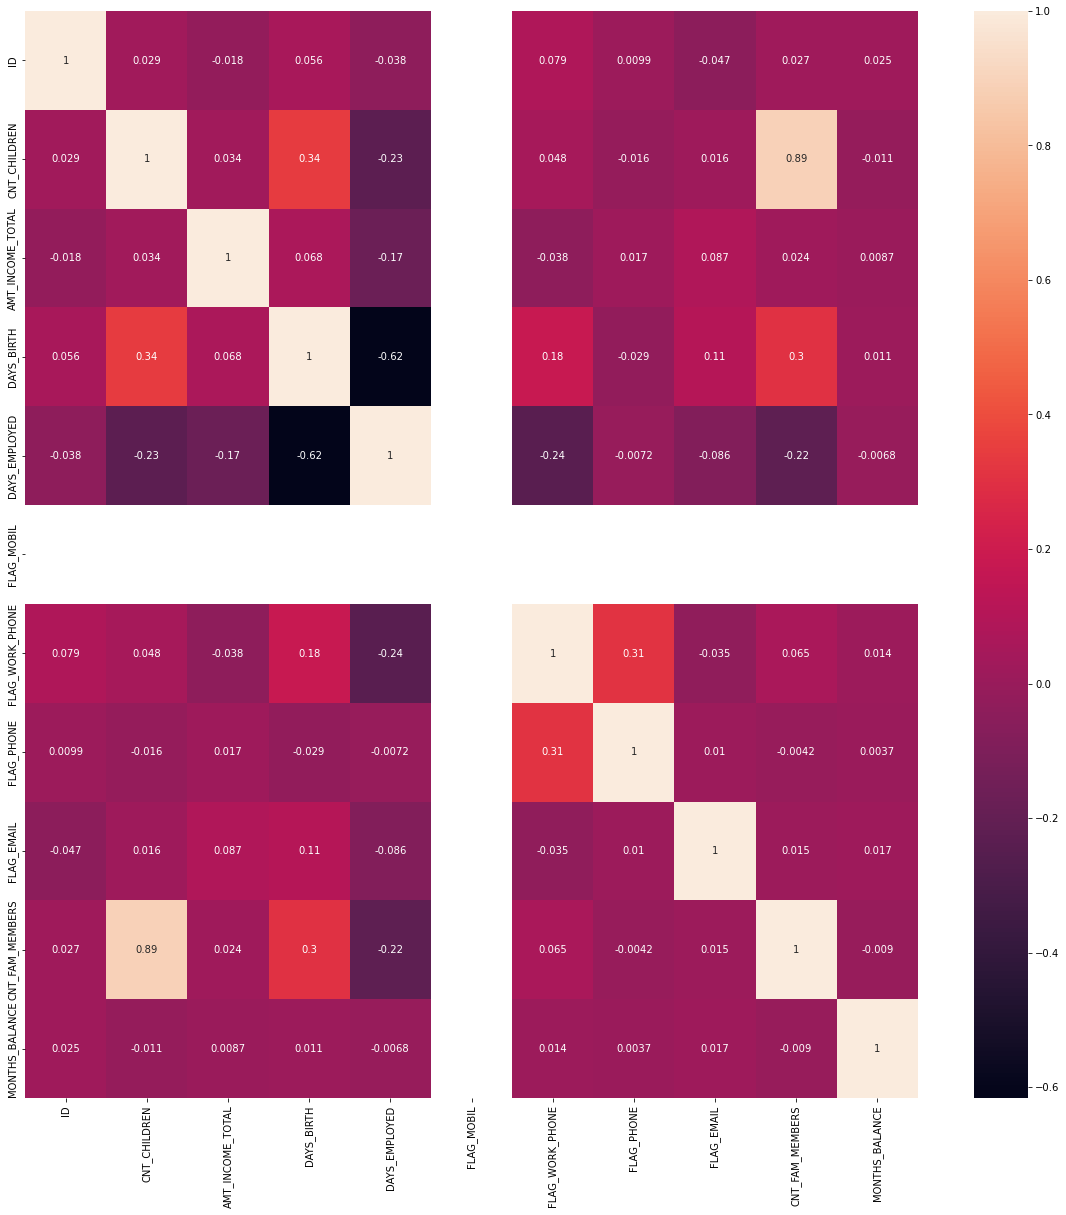

In [180]:
# Se observo el grafico de correlacion para entender la relacion entre las variables.
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

Como podemos ver en el grafico de correlacion, FLAG_MOBIL no esta relacionada con ninguna otra columna por lo que se eliminara.
Tambien se eliminaran las variables FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, ID ya que estas no son un gran factor al momento de entregar una tarjeta de credito.

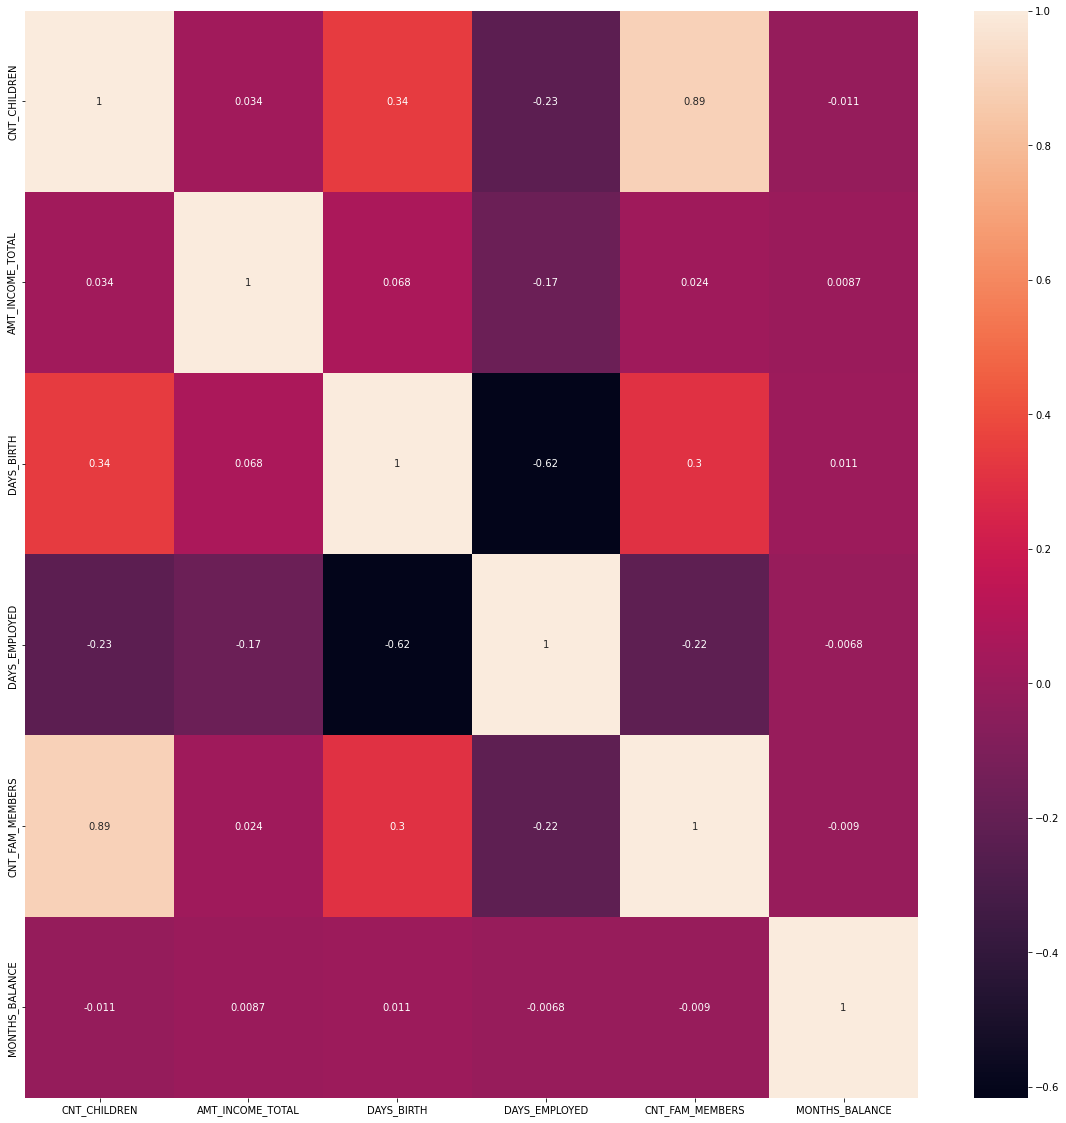

In [181]:
# Se eliminan las variables FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, ID, NAME_HOUSING_TYPE.
data = data.drop('FLAG_MOBIL',axis=1)
data = data.drop('FLAG_WORK_PHONE',axis=1)
data = data.drop('FLAG_PHONE',axis=1)
data = data.drop('FLAG_EMAIL',axis=1)
data = data.drop('ID',axis=1)
# Se puede observar el grafico de correlacion despues de que se eliminaron las variables anteriores.
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 777701
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          36457 non-null  object 
 1   FLAG_OWN_CAR         36457 non-null  object 
 2   FLAG_OWN_REALTY      36457 non-null  object 
 3   CNT_CHILDREN         36457 non-null  int64  
 4   AMT_INCOME_TOTAL     36457 non-null  float64
 5   NAME_INCOME_TYPE     36457 non-null  object 
 6   NAME_EDUCATION_TYPE  36457 non-null  object 
 7   NAME_FAMILY_STATUS   36457 non-null  object 
 8   NAME_HOUSING_TYPE    36457 non-null  object 
 9   DAYS_BIRTH           36457 non-null  int64  
 10  DAYS_EMPLOYED        36457 non-null  int64  
 11  OCCUPATION_TYPE      36457 non-null  object 
 12  CNT_FAM_MEMBERS      36457 non-null  float64
 13  MONTHS_BALANCE       36457 non-null  int64  
 14  STATUS               36457 non-null  object 
dtypes: float64(2), int64(4), object(9)


#### Manipulacion de las variables.

Esta manipulacion entregara una mejor performance al momento de aplicar nuestros modelos supervisados.

Las variables CODE_GENDER, FLAG_OWN_CAR y FLAG_OWN_REALITY son variables binarias, por lo que se deben transformar a 0 y 1 respectivamente.

Las variables NAME_EDUCATION_TYPE Y NAME_FAMILY_STATUS, se puede observar valores como "Secondary / secondary special" y "Single / not married" estos se simplificaran a "secondary" y "single" respectivamente.

Las variables DAYS_BIRTH y DAYS_EMPLOYED son variables de fecha las cuales estan en formato de dias, por lo que se transformaran a un formato de fecha. Tambien se creara apartir de estas una columna "AGE" la cual entregara la edad del postulante y reemplazara la columna DAYS_BIRTH, tambien se creara

La variable STATUS se modifica cambiando los valores de C y X a 6 y 7 y luego se filtran los valores de las categorias en RISKY para valores 2,3,4 y 5 y NOT RISKY para el resto de los valores, esta sera la *clasificacion binaria*.

botamos la variable OCCUPATION_TYPE ya que no es relevante saber el tipo de trabajo que tiene el postulante.

## Referencia
Credit_Card_Approval. (2022, October 6). Kaggle. 
[Credit Card Approval Analisis](https://www.kaggle.com/code/saurav12suman/credit-card-approval#Feature-Engineering)



In [183]:
# Cambiamos estas columnas a binario
male = pd.get_dummies(data['CODE_GENDER'],drop_first=True)
car = pd.get_dummies(data['FLAG_OWN_CAR'],drop_first=True)
Property = pd.get_dummies(data['FLAG_OWN_REALTY'],drop_first=True)

male = male.rename({'M': 'IS_MALE'}, axis=1)
car = car.rename({'Y': 'HAS_CAR'}, axis=1)
Property = Property.rename({'Y': 'HAS_PROPERTY'}, axis=1)

data.drop(['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY'],inplace=True,axis=1)

# Simplificacion de variables

#estas funciones renombran algunos de
#las valores de las variables NAME_EDUCATION_TYPE Y NAME_FAMILY_ESTATUS
def education(x):
    if x=='Secondary / secondary special':
        x=x.split(' / ')[0]
    return x

data['NAME_EDUCATION_TYPE']=data['NAME_EDUCATION_TYPE'].apply(education)
def fun(x):
    if x=='Single / not married':
        x=x.split(' / ')[0]
    return x

data['NAME_FAMILY_STATUS']=data['NAME_FAMILY_STATUS'].apply(fun)

# Esta funcion cambia los valres de DAYS_BIRTH a formato datetime
def Date_of_Birth(total_days):
    today = datetime.date.today()
    birthday = (today + timedelta(days=total_days)).strftime('%Y-%m-%d')
    return birthday                  

# Esta funcion toma los valores de DAYS_EMPLOYED y los convierte al formato datetime
def Employed_day(total_days):
    today = datetime.date.today()
    employed_date = (today + datetime.timedelta(days=total_days)).strftime('%Y-%m-%d')

data['DAYS_BIRTH']=data['DAYS_BIRTH'].apply(Date_of_Birth)
data['DAYS_EMPLOYED']=data['DAYS_EMPLOYED'].apply(Date_of_Birth)

#Esta funcion calcula la edad del postulante
def AGE(date_of_birth):
    today=datetime.date.today()
    dateofbirth=datetime.datetime.strptime(date_of_birth,'%Y-%m-%d')
    age=today.year-dateofbirth.year
    return age

data['DAYS_BIRTH']=data['DAYS_BIRTH'].apply(AGE)
data['DAYS_EMPLOYED']=data['DAYS_EMPLOYED'].apply(AGE)

# Se cambia el nombre de las columnas a uno mas relevante
data = data.rename({'DAYS_BIRTH': 'AGE', 'DAYS_EMPLOYED': 'DAYS_WORKED'}, axis=1)

# se cambian los valores de C y X para poder manipularlos
data.loc[data['STATUS']=='C','STATUS']=6
data.loc[data['STATUS']=='X','STATUS']=7
data['STATUS']=data['STATUS'].astype(float)


# Esta funcion define el estatus como RISKY si estan en los siguientes valores de 2,3,4,5 y el resto
# los define como NOT RISKY
def solve(state):
    target=''
    if state in (2,3,4,5):
        target=1 #Risky
    else :
        target=0 #not Risky
        
    return target
    
# Se general la columna target
data['TARGET']=data['STATUS'].apply(solve)

# Se agregan las nuevas variables al dataset
data = pd.concat([data,male,car,Property],axis=1)

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 777701
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CNT_CHILDREN         36457 non-null  int64  
 1   AMT_INCOME_TOTAL     36457 non-null  float64
 2   NAME_INCOME_TYPE     36457 non-null  object 
 3   NAME_EDUCATION_TYPE  36457 non-null  object 
 4   NAME_FAMILY_STATUS   36457 non-null  object 
 5   NAME_HOUSING_TYPE    36457 non-null  object 
 6   AGE                  36457 non-null  int64  
 7   DAYS_WORKED          36457 non-null  int64  
 8   OCCUPATION_TYPE      36457 non-null  object 
 9   CNT_FAM_MEMBERS      36457 non-null  float64
 10  MONTHS_BALANCE       36457 non-null  int64  
 11  STATUS               36457 non-null  float64
 12  TARGET               36457 non-null  int64  
 13  IS_MALE              36457 non-null  uint8  
 14  HAS_CAR              36457 non-null  uint8  
 15  HAS_PROPERTY         36457 non-null

In [185]:
# Creamos diccionarios para transformar las variables a numeros

lst = {'Working': 1, 'Commercial associate': 2,
       'Pensioner': 3, 'State servant': 4, 'Student': 5}
lst1 = {'Secondary': 1, 'Higher education': 2, 'Incomplete higher': 3,
        'Lower secondary': 4, 'Academic degree': 5}
lst2 = {'Married': 1, 'Single': 2,
        'Civil marriage': 3, 'Separated': 4, 'Widow': 5}
lst3 = {'House / apartment': 1, 'With parents': 2, 'Municipal apartment': 3,
        'Rented apartment': 4, 'Office apartment': 5, 'Co-op apartment': 6}
lst4 = {'Laborers': 1,
        'Core staff': 2,
        'Sales staff': 3,
        'Managers': 4,
        'Drivers': 5,
        'High skill tech staff': 6,
        'Accountants': 7,
        'Medicine staff': 8,
        'Cooking staff': 9,
        'Security staff': 10,
        'Cleaning staff': 11,
        'Private service staff': 12,
        'Low-skill Laborers': 13,
        'Secretaries': 14,
        'Waiters/barmen staff': 15,
        'HR staff': 16,
        'IT staff': 17,
        'Realty agents': 18,
        'OTHER': 19}

# Reemplazamos los valores en las columnas
data.replace({'NAME_INCOME_TYPE': lst}, inplace=True)
data.replace({'NAME_EDUCATION_TYPE': lst1}, inplace=True)
data.replace({'NAME_FAMILY_STATUS': lst2}, inplace=True)
data.replace({'NAME_HOUSING_TYPE': lst3}, inplace=True)
data.replace({'OCCUPATION_TYPE': lst4}, inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 777701
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CNT_CHILDREN         36457 non-null  int64  
 1   AMT_INCOME_TOTAL     36457 non-null  float64
 2   NAME_INCOME_TYPE     36457 non-null  int64  
 3   NAME_EDUCATION_TYPE  36457 non-null  int64  
 4   NAME_FAMILY_STATUS   36457 non-null  int64  
 5   NAME_HOUSING_TYPE    36457 non-null  int64  
 6   AGE                  36457 non-null  int64  
 7   DAYS_WORKED          36457 non-null  int64  
 8   OCCUPATION_TYPE      36457 non-null  int64  
 9   CNT_FAM_MEMBERS      36457 non-null  float64
 10  MONTHS_BALANCE       36457 non-null  int64  
 11  STATUS               36457 non-null  float64
 12  TARGET               36457 non-null  int64  
 13  IS_MALE              36457 non-null  uint8  
 14  HAS_CAR              36457 non-null  uint8  
 15  HAS_PROPERTY         36457 non-null

Luego de la manipulacion del dataset todas las variables pasaron a ser numericas.

#### Escalamiento de los datos
En la siguiente seccion se normalizaran los datos para poder usarlos en los modelos de prediccion.
Normalización: se refiere a re-escalar las características en un rango
[0,1], que es un caso especial de la re-escalamiento “min-max”. Para
normalizar nuestros datos, simplemente necesitaremos aplicar el método
de re-escalamiento “min-max” a cada columna de características. (Machine Learning Modelos predictivos Introducción, diapositiva 14)

En los problemas de clasificacion binaria tenemos dos datasets, la primera contiene la data a analizar y la segunda es el target que se busca obtener al momento de generar la prediccion.


#### Referencias
Universidad Adolfo Ibañez. (s. f.). Machine Learning: Modelos predictivos [Diapositivas; PDF]. Machine Learning Modelos predictivos Introducción.\
[Introduccion a modelos predictivos](https://webc.uai.cl/pluginfile.php/778942/mod_folder/content/0/06%20Predictivo%20Intro-KNN.pdf?forcedownload=1)\
Binary Classification. (n.d.).\
[Clasificacion Binaria](https://www.learndatasci.com/glossary/binary-classification/)

In [186]:
# Se utiliza MinMaxScaler para normalizar los datos.
from sklearn.preprocessing import MinMaxScaler

# x sera nuestra data
x=data.drop('TARGET',axis=1)
# y sera nuestro target data
y=data['TARGET']

scaler=MinMaxScaler()
scaler.fit_transform(x)

# Vizualizacion de los datos escalados
feature_scale = [feature for feature in data.columns if feature!='TARGET']
data = pd.concat([data['TARGET'].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(x), columns=feature_scale)],
                    axis=1)

data.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_WORKED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,IS_MALE,HAS_CAR,HAS_PROPERTY
0,0,0.0,0.258721,0.00,0.25,0.50,0.6,0.250000,0.970278,1.000000,0.052632,1.000000,0.857143,1.0,1.0,1.0
1,0,0.0,0.258721,0.00,0.25,0.50,0.6,0.250000,0.970278,1.000000,0.052632,1.000000,0.857143,1.0,1.0,1.0
2,0,0.0,0.055233,0.00,0.00,0.00,0.0,0.791667,0.961649,0.500000,0.052632,1.000000,0.857143,1.0,1.0,1.0
3,0,0.0,0.156977,0.25,0.00,0.25,0.0,0.666667,0.966443,0.111111,0.000000,1.000000,0.000000,0.0,0.0,1.0
4,0,0.0,0.156977,0.25,0.00,0.25,0.0,0.666667,0.966443,0.111111,0.000000,0.633333,1.000000,0.0,0.0,1.0


In [187]:
# Revisamos el ratio de valores en el dataset en base al TARGET
data.TARGET.value_counts()

0    36351
1      106
Name: TARGET, dtype: int64

#### Oversampling de una base de dato desbalanceada

Al observar los valores de el target, se pueden apreciar que existen 36351 valores en 0 (NOT RISKY) y 106 valores en 1(RISKY) por lo que el dataset esta desbalanceado en favor a NOT RISKY, por lo que se utilizara un algoritmo llamado synthetic minority over-sampling technique (SMOTE) que genera un oversampling de valores al azar de la clase que es minoria, en este caso genera mas valores RISKY para balancear el dataset.


#### Referencia
Imbalanced Classification in Python: SMOTE-Tomek Links Method (November 2022)
[SMOTE](https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc)

In [188]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=1)
# Hacemos el oversampling de los datos
x_res,y_res=smk.fit_resample(x,y)

In [189]:
from collections import Counter
# Comparamos la base de datos antigua con la base de datos con valores creados por SMOTE
print('original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

original dataset shape Counter({0: 36351, 1: 106})
Resampled dataset shape Counter({0: 36327, 1: 36327})


Como se puede apreciar, ya no esta desbalanceada la base de datos.

#### Aplicacion de modelos predictivos

En la siguiente seccion se aplicaran los modelos de regresion logistica, arboles de decision y naive bayes.
Se observara el accuracy, precision, recall y f1 score para determinar el mejor modelo para esta base de datos.\
Tambien se observara la matriz de confusion para poder interpretar visualmente los datos

El modelo es:  <class 'sklearn.linear_model._logistic.LogisticRegression'>
              precision    recall  f1-score   support

           0       0.64      0.37      0.47      7401
           1       0.54      0.78      0.64      7130

    accuracy                           0.57     14531
   macro avg       0.59      0.58      0.56     14531
weighted avg       0.59      0.57      0.55     14531

El modelo es:  <class 'sklearn.tree._classes.DecisionTreeClassifier'>
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      7401
           1       0.81      1.00      0.89      7130

    accuracy                           0.88     14531
   macro avg       0.90      0.88      0.88     14531
weighted avg       0.91      0.88      0.88     14531

El modelo es:  <class 'sklearn.naive_bayes.GaussianNB'>
              precision    recall  f1-score   support

           0       0.67      0.32      0.44      7401
           1       0.54      0.84   

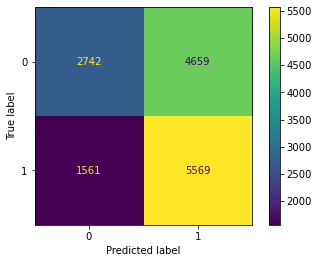

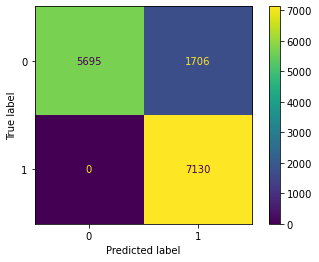

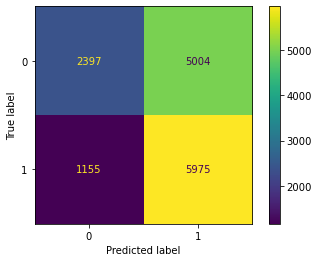

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Se general los train y test splits
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=1)
x_train.shape,y_train.shape
# lista de modelos a utilizar
model_list=[LogisticRegression,DecisionTreeClassifier,GaussianNB]

accuracy =[]
for model in model_list :
    print("El modelo es: ",model)
    if model == LogisticRegression:
        model = model(random_state=1)
    elif model == DecisionTreeClassifier:
        model = model(max_depth= 1,random_state=1)
    else:
        model = model()
    # Se aplica el modelo
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    # Se plotea la matriz de confusion
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    # Se imprime el reporte de clasificacion
    print(classification_report(y_test, y_pred))
    accuracy.append(accuracy_score(y_test,y_pred))
print("El porcentaje de 'accuracy' para los tres modelos es: ",accuracy)

Como se observa en las matrices de confusion, el mejor modelo es el modelo de arboles de decision, es mas es perfecto, por lo que se puede inferir que dentro de este modelo ocurrio overfitting, lo que llevo al resultado mostrado. \
Por esto no se contara como un resultado real, ya que se encuentra sobre entrenado el modelo, en vez observaremos al modelo de regresion logistica y naive bayes, los cuales posseen un accuracy del 56% y 57%, los cuales no son lo suficientemente altos para definir un modelo de prediccion adecuado para este dataset.\
En el modelo de regresion logistica se puede observar que erroneamente obtuvo 4582 falsos positivos y 1790 falsos negativos.
En el modelo de naive bayes se puede observar que erroneamente obtuvo 4942 falsos positivos y 1166 falsos negativos.